In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

from scipy.stats import boxcox, boxcox_llf, boxcox_normmax, f_oneway, shapiro, probplot
from scipy.optimize import brent
from scipy.special import ndtri

In [7]:
def filliben(n):
    result = np.zeros(n)
    result[-1] = 0.5**(1./n)
    result[0] = 1 - 0.5**(1./n)
    for i in range(2, n):
        result[i-1] = (i - 0.3175) / (n + 0.365)
    return result

In [89]:
def qqplot(data, color = '#1f77b4', figsize = (10,10), axis_scaling = 'equal', return_plot = True, return_xy = False):
    from scipy.special import ndtri
    def _filliben(n):
        result = np.zeros(n)
        result[-1] = 0.5**(1./n)
        result[0] = 1 - 0.5**(1./n)
        for i in range(2, n):
            result[i-1] = (i - 0.3175) / (n + 0.365)
        return result
    
    array = np.sort(data)
    nd_ppf = ndtri(_filliben(array.size))
    
    if return_plot:
        fig, ax = plt.subplots(1,1, figsize=figsize)
        ax.set_aspect(axis_scaling)
        ax.scatter(nd_ppf, array, s=5, color = color, label='data')
        ax.axline((0,0), (1,1), color='#ff7f0e', label='line $y=x$')

        ax.axline((0,0), (0,1), linestyle=':', linewidth=1, color='k')
        ax.axline((0,0), (1,0), linestyle=':', linewidth=1, color='k')
        plt.title('Q-Q plot', fontsize=16)
        plt.legend(fontsize=12)
        plt.show()
    else:
        None
        
    if return_xy:
        return (nd_ppf, array)
    else:
        None

# Load data

In [3]:
data = load_boston()

In [4]:
X = data['data']
y = data['target']

In [5]:
data['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [99]:
feat_num = -1
array = X[:,feat_num].copy()
array1 = boxcox(array)[0]

# Q-Q plot

## by scipy library

In [100]:
val, sl = probplot(StandardScaler().fit_transform(array.reshape(-1,1)).flatten(), )
val1, sl1 = probplot(StandardScaler().fit_transform(array1.reshape(-1,1)).flatten(), )

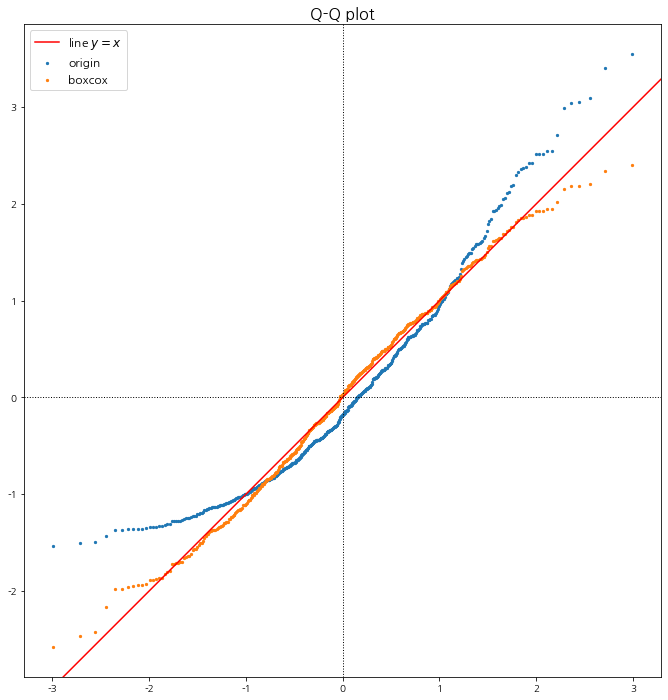

In [101]:
fig, ax = plt.subplots(1,1, figsize=(12,12))
ax.set_aspect(1)
ax.scatter(val[0], val[1], s=5, label='origin')
ax.scatter(val1[0], val1[1], s=5, label='boxcox')

ax.axline((0,0), (1,1), color='r', label='line $y=x$')
ax.axline((0,0), (0,1), linestyle=':', linewidth=1, color='k')
ax.axline((0,0), (1,0), linestyle=':', linewidth=1, color='k')

plt.title('Q-Q plot', fontsize=16)
plt.legend(fontsize=12)
plt.show()

## by my code

In [25]:
array_sc = np.sort(StandardScaler().fit_transform(array.reshape(-1,1)).flatten())
array1_sc = np.sort(StandardScaler().fit_transform(array1.reshape(-1,1)).flatten())
norm_ppf = ndtri(filliben(array.size))

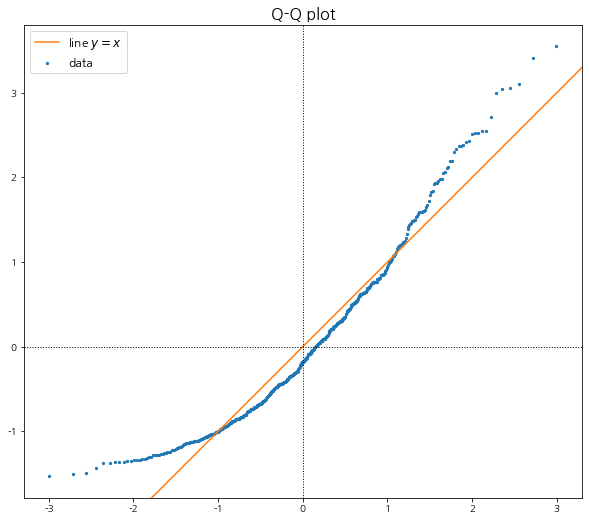

In [98]:
qqplot((array-array.mean())/array.std(), )